
Newton Interpolation: 
Population in 2014 (N.InterPol):  50000.0
Population in 2015 (N.InterPol):  60000.0
Population in 2016 (N.InterPol):  70000.0
Population in 2017 (N.InterPol):  80000.0
Population in 2018 (N.InterPol):  90000.0
Population in 2019 (N.InterPol):  100000.0
Population in 2020 (N.InterPol):  110000.0
Population in 2021 (N.InterPol):  120000.0
Population in 2022 (N.InterPol):  130000.0
Population in 2023 (N.InterPol):  140000.0

Newton Raphson: 
Population in 2014 (N.Raphson):  2.0945514815476374
Population in 2015 (N.Raphson):  2.0945514815423265
Population in 2016 (N.Raphson):  2.0945514815425184
Population in 2017 (N.Raphson):  2.0945514816272457
Population in 2018 (N.Raphson):  2.0945514815423265
Population in 2019 (N.Raphson):  2.0945514815423407
Population in 2020 (N.Raphson):  2.094551481544205
Population in 2021 (N.Raphson):  2.0945514816272457
Population in 2022 (N.Raphson):  2.0945514833158665
Population in 2023 (N.Raphson):  2.094551481542327

Curve Fitting:

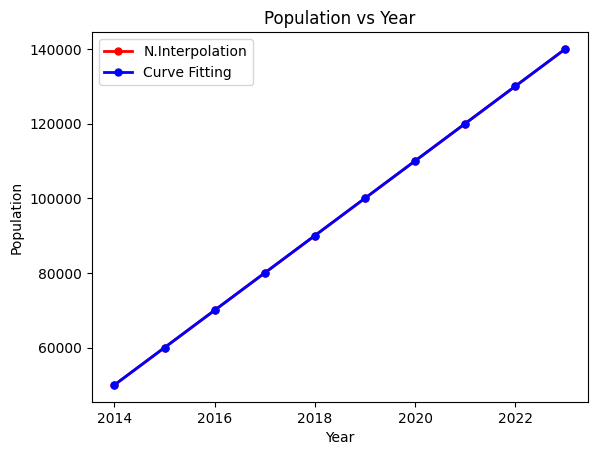

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def NewtonInterpolation(years, population, target_year):        # forward method
    delta = []
    delta.append(population)
    for i in range(len(population)-1):
        delta.append([])
        for j in range(len(population)-i-1):
            delta[i+1].append(delta[i][j+1] - delta[i][j])
    # print the delta table
    #print("Delta table:")
    #print(delta)
    p = (target_year - years[0]) / (years[1] - years[0])
    target_population = population[0]
    static_p = p
    fact = 1
    for i in range(1, len(delta)):
        fact *= i
        target_population += p * delta[i][0] / fact    # forward method, so delta[i][0]
        p *= (static_p-i)

    return target_population

def raphson_func(x):
    function = x**3 - 2*x - 5
    derivative = 3*x**2 - 2
    return [function, derivative]

def newton_raphson(population, accuracy = 0.0001):
    Xn = population - raphson_func(population)[0] / raphson_func(population)[1]
    while abs(Xn - population) > accuracy:
        population = Xn
        if (raphson_func(population)[1] == 0):
            print("Error! - derivative zero for x = ", population)
            return None
        Xn = population - raphson_func(population)[0] / raphson_func(population)[1]
    return Xn



def curve_fitting(years, population, target_year):      # straight line method
    n = len(years)
    sum_x = sum(years)
    sum_y = sum(population)
    sum_x_squared = sum([i**2 for i in years])
    sum_xy = sum([years[i]*population[i] for i in range(n)])

    m = (n*sum_xy - sum_x*sum_y) / (n*sum_x_squared - sum_x**2)
    c = (sum_y - m*sum_x) / n

    predicted_population = m*target_year + c
    return predicted_population

if __name__ == "__main__":
    data = pd.read_csv('population_data.csv')

    #years = data[data.columns[0]].tolist()
    #population = data[data.columns[1]].tolist()
    years=[2010,2011,2012,2013]
    population=[10000,20000,30000,40000]

    last_year = 2013

    # Next 10 years for prediction
    target_year_values = [last_year + i for i in range(1, 11)]

    # Calculate populations for Newton Interpolation and Curve Fitting
    target_population_newton = [NewtonInterpolation(years, population, year) for year in target_year_values]
    target_population_newton_raphson = [newton_raphson(pop) for pop in target_population_newton]
    target_population_curve_fit = [curve_fitting(years, population, year) for year in target_year_values]

    print("\nNewton Interpolation: ")
    for year, pop in zip(target_year_values, target_population_newton):
        print("Population in", year, "(N.InterPol): ", pop)

    print("\nNewton Raphson: ")
    for year, pop in zip(target_year_values, target_population_newton_raphson):
        print("Population in", year, "(N.Raphson): ", pop)

    print("\nCurve Fitting: ")
    for year, pop in zip(target_year_values, target_population_curve_fit):
        print("Population in", year, "(CurveFit): ", pop)


    plt.rcParams.update({
        'lines.linewidth': 2,
        'lines.markersize': 5
    })

    plt.plot(target_year_values, target_population_newton, 'ro-', label='N.Interpolation')
    plt.plot(target_year_values, target_population_newton_raphson, 'go-', label='N.Raphson')
    plt.plot(target_year_values, target_population_curve_fit, 'bo-', label='Curve Fitting')

    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Population vs Year')
    plt.legend()
    plt.show()


[-3.58665478e+02  3.28329898e+06 -5.00144883e+09]


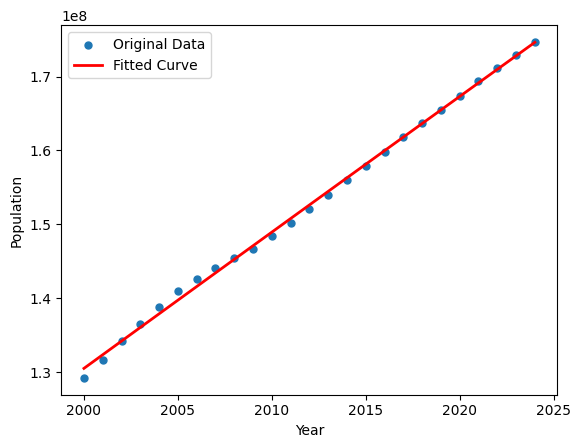

Fitted Polynomial Coefficients: [-3.58665478e+02  3.28329898e+06 -5.00144883e+09]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
                  2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

populations = np.array([129193327, 131670484, 134139826, 136503206, 138789725, 140912590, 142628831, 144135934,
                        145421318, 146706810, 148391139, 150211005, 152090649, 154030139, 155961299, 157830000,
                        159784568, 161793964, 163683958, 165516222, 167420951, 169356251, 171186372, 172954319, 174701211])

# Fit a polynomial of degree 2 (you can adjust the degree as needed)
coefficients = np.polyfit(years, populations, 2)
print(coefficients)

# Generate a polynomial function based on the coefficients
poly_function = np.poly1d(coefficients)

# Predict population for each year
predicted_populations = poly_function(years)

# Plot the original data and the fitted curve
plt.scatter(years, populations, label='Original Data')
plt.plot(years, predicted_populations, label='Fitted Curve', color='red')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# Display the coefficients of the fitted polynomial
print(f"Fitted Polynomial Coefficients: {coefficients}")
